# Practical introduction to RDF and SPARQL

**Version:** 1.3

## Objective

The goal of this notebook is to make you comfortable with representing (simple) knowledge graphs in RDF, and then write simple SPARQL queries.

```{note} Reminder: IRIs and Literals

**Resource** refer two complex objects identified by an **IRI** (International Resource Identifier == URI allowing international characters). Note that URLs are IRIs pointing to web accessible documents/data. URIs can be shortened with **PREFIX**. As an example `<http://my/super/vocab/my_term>` can be shortened as `ns:my_term` if `ns` is defined as a prefix for `http://my/super/vocab/`. 

**Literals** refer two simple values (numercial values, strings, boolean, dates)
```

```{note} Reminder: RDF, triples

1. an RDF **statement** represents a **relationship** between two resources: a **subject** and an **object**
1. relationships are directional and are called a .red[predicates] (or RDF properties)
1. (logical) statements are called **triple** : {`subject`, `predicate`, `object`}
1. a set of triples form a **directed labelled graph** : subject nodes are IRIs, edges are predicate (IRIs only),  object nodes are IRIs or Literals. 

Go through https://www.w3.org/TR/rdf11-primer/ to have more details on RDF.

```

```{note} Reminder: Turtle syntax
- header to define prefix
   - example: with `@prefix ns: http://my_voc# .`, `http://my_voc#term` can be written as `ns:term` 
- generally one line per triple with a `.` at the end: `<subject> <predicate> <object> .`
- possible shortcuts to share the same subject: `;` 
```
s p1 o1 ; 
    p2 o2 .
```
- possible shortcuts to share the same subject-predicate: `,` 
```
s p o1, o2, o3 .
```

```

```{note} Exemple

turtle syntax: 
```ruby
<http://HG37> rdf:type <http://human_genome> .
<http://sample1> <http://is_aligned_with> <http://HG37> .
<http://sample1> rdfs:comment "Sample 1 from Study X [...]"^^xsd:string .
```

or 

```turtle
<http://HG37> rdf:type <http://human_genome> .
<http://sample1> <http://is_aligned_with> <http://HG37> ;
              rdfs:comment "Sample 1 from Study X [...]"^^xsd:string .
```
```

## Question 1
 
1. Consider the following RDF properties `family:has_mother`, `family:has_father`, `family:has_sister`
2. Represent with RDF triples the following family:
    -  *The mother of John is Mary*,
    -  *Mickael is the son of Mark*,
    -  *Mickael and John are cousins*,
    -  *Mark is the uncle of John*.
3. Go to https://www.ldf.fi/service/rdf-grapher 
4. Generate a graphical representation of the RDF graph.

In [7]:
my_rdf_data = """
PREFIX family: <http://etbii>

<http://John> family:has_mother <http://Mary> .
<http://Mickael> family:has_father <http://Mark> .
<http://Mark> family:has_sister <http://Mary> .

"""

Go to https://www.ldf.fi/service/rdf-grapher 

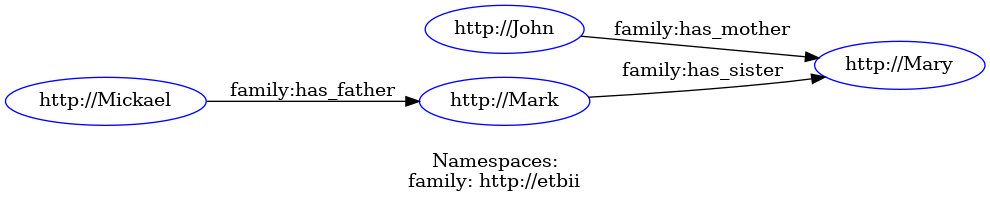

# SPARQL hands-on

SPARQL is the standards language to query multiple data sources expressed in RDF. The principle consists in defining a **graph pattern** to be matched against an RDF graph.

`````{definition} Definition
:class: tip

**Triple Patterns** (TPs) are like RDF triples except that each of the *subject*, *predicate* and *object* may be a **variable**. Variables are prefixed with a `?` . 

`````

`````{Example} Example
Triple pattern
```ruby
?x <is_a_variant_of> <RAC1> .
```

RDF graph
```ruby
<SNP:123> <is_a_variant_of> <NEMO> .
<SNP:rs527330002> <is_a_variant_of> <RAC1> .
<SNP:rs527330002> <refers_to_organism> <http://www.uniprot.org/taxonomy/9606> .
<SNP:rs61753123> <is_a_variant_of> <RAC1> .
```

Bindings of variables `?x`
```ruby
?x = <SNP:rs527330002>
?x = <SNP:rs61753123>
```

`````

`````{definition} Definition
:class: tip
**Basic Graph Patterns** (BGPs) consist in a set of triple patterns to be matched against an RDF graph.

`````
`````{Example} Example

Basic graph pattern

```ruby
?x <is_a_variant_of> <RAC1> .
?x <is_a_risk_factor_for> ?z
```
![:scale 60%](fig/bgp.png)

`````


# 4 Types of SPARQL queries
- **SELECT** : returns the variables values (i.e. bound variables) for each graph pattern match ;
- **CONSTRUCT** : returns an RDF graph constructed by substituting variables in a set of triple patterns ;
- **ASK** : returns a boolean (true/false) indicating whether a query pattern matches or not ;
- **DESCRIBE** : returns an RDF graph that describes the resources found (resources neighborhood).

<br>
<br>
Additional features: Optional BGPs, union, filters, aggregate functions, negation, service, *etc.*

# Anatomy of a SPARQL query

![:scale 95%](fig/anat.png)

`DESCRIBE <http://identifiers.org/hgnc.symbol/RAC1>`

## Question 2
We will now use the RDFlib package to parse RDF Data and do some very basic SPARQL queries. 

In [ ]:
from rdflib import Graph

# RDF graph, in turtle syntax, stored in a string
my_rdf_data = """
@prefix ns: <http://my_voc/> .
@prefix snp: <http://my_snps/> .

snp:123 ns:is_a_variant_of "NEMO" .
snp:rs527330002 ns:is_a_variant_of "RAC1" .
snp:rs527330002 ns:refers_to_organism <http://www.uniprot.org/taxonomy/9606> .
snp:rs61753123 ns:is_a_variant_of "RAC1" .
"""

# Initialization of the in-memory RDF graph, RDFlib Graph object
kg = Graph()

# Parsing of the RDF data
kg.parse(data=my_rdf_data, format='turtle')

# Printing the size of the graph and serializing it again. 
print(f'the knowledge graph contains {len(kg)} triples\n')
print(kg.serialize(format="turtle"))

the knowledge graph contains 4 triples

@prefix ns: <http://my_voc/> .
@prefix snp: <http://my_snps/> .

snp:123 ns:is_a_variant_of "NEMO" .

snp:rs527330002 ns:is_a_variant_of "RAC1" ;
    ns:refers_to_organism <http://www.uniprot.org/taxonomy/9606> .

snp:rs61753123 ns:is_a_variant_of "RAC1" .




We now execute a simple query to search for all "variants" of `RAC1`. 

In [2]:
q = """
SELECT ?x WHERE {
    ?x ns:is_a_variant_of "RAC1" .
}
"""

res = kg.query(q)
for row in res:
    print(f"{row['x']} is a variant of RAC1")

http://my_snps/rs527330002 is a variant of RAC1
http://my_snps/rs61753123 is a variant of RAC1


## Question 3 
Generalize this query to show all *is a variant of* relations. You can use two variables `?x` and `?y`. 

In [8]:
q = """

PREFIX ns: <http://my_voc/>

SELECT ?x ?y WHERE {
?x ns:is_a_variant_of ?y .

}
"""

res = kg.query(q)
for row in res:
    print(f"{row['x']} is ...")

http://my_snps/123 is ...
http://my_snps/rs527330002 is ...
http://my_snps/rs61753123 is ...


## Question 4
Search for the name of the gene who has a variant refering to the `http://www.uniprot.org/taxonomy/9606` organism

In [12]:
q = """

PREFIX ns: <http://my_voc/>

SELECT ?x WHERE {
?x ns:is_an_organism_of ?x .

}
"""

res = kg.query(q)
for row in res:
    print(row)